# Introduction


# Questions

# Data wrangling 

In [1]:
#impoting python libraies 
import pandas as pd
import numpy as np

#imoprting visualization libraies
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#import data 
df_train = pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")
df_test = pd.read_csv("/kaggle/input/bigmart-sales-data/Test.csv")

In [3]:
#print the first five rows from the data 
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#extract catigorical data 
df_cat = df_train[[
    "Item_Identifier" , "Item_Fat_Content" , "Item_Type" , "Outlet_Identifier" , "Outlet_Size" , "Outlet_Location_Type" ,
    "Outlet_Type"
]]

In [8]:
#show how many diffrent types of catigorical data
for features in df_cat.columns:
    print(f"{features} : {df_train[features].nunique()}" )

Item_Identifier : 1559
Item_Fat_Content : 5
Item_Type : 16
Outlet_Identifier : 10
Outlet_Size : 3
Outlet_Location_Type : 3
Outlet_Type : 4


In [9]:
df_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
df_train["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [11]:
df_train["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [12]:
df_train["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
df_train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# EDA

In [14]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1 - What is the highest selling product?

In [15]:
df_train.groupby(["Item_Type"])["Item_Outlet_Sales"].sum().sort_values(ascending = False)

Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Breads                   5.532372e+05
Hard Drinks              4.577934e+05
Starchy Foods            3.514013e+05
Others                   3.255176e+05
Breakfast                2.322990e+05
Seafood                  1.488682e+05
Name: Item_Outlet_Sales, dtype: float64

In [16]:
df_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
#chane the data in item fat content to be the same 
dic = {
    "Low Fat" : "Low Fat" ,
    "low fat" : "Low Fat" , 
    "LF" : "Low Fat" ,
    "reg" : "Regular" , 
    "Regular" : "Regular" ,
} 
df_train["Item_Fat_Content"] = df_train["Item_Fat_Content"].map(dic)

In [18]:
df_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


let's handle missing values


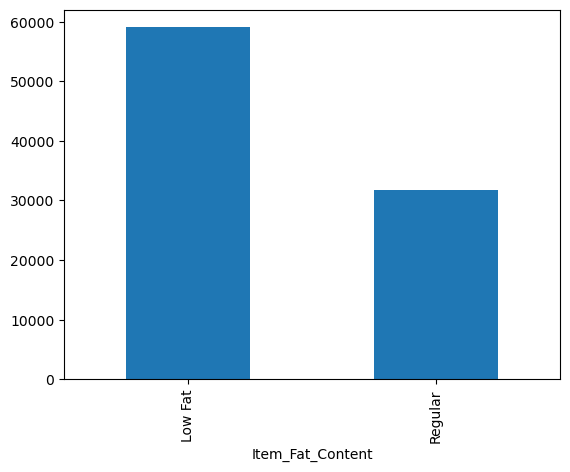

In [20]:
df_train.groupby(["Item_Fat_Content"])["Item_Weight"].sum().plot(kind = "bar");

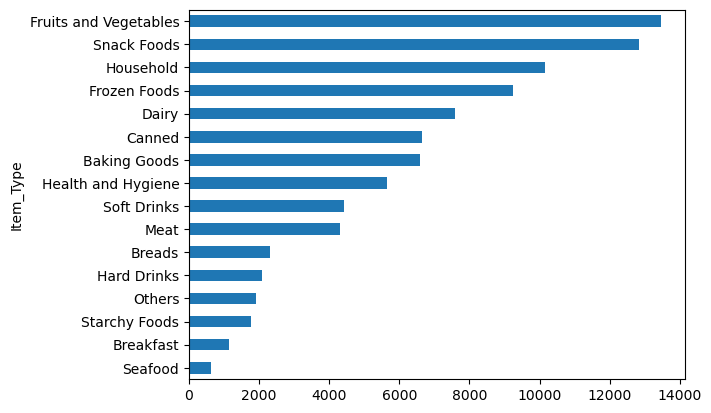

In [21]:
df_train.groupby(["Item_Type"])["Item_Weight"].sum().sort_values().plot(kind = "barh");

In [22]:
df_train.groupby(["Item_Type"])["Item_Weight"].mean()

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [23]:
#the data has the same mean nearly so we can fill the missing values with the mean 
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean() , inplace = True)

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [25]:
df_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [26]:
df_train.groupby(["Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

show how many nan values in each outlet type

In [27]:
df_train[(df_train['Outlet_Type'] == "Grocery Store") ]['Outlet_Size'].isna().sum()

555

In [28]:
df_train[(df_train['Outlet_Type'] == "Supermarket Type1") ]['Outlet_Size'].isna().sum()

1855

In [29]:
df_train[(df_train['Outlet_Type'] == "Supermarket Type2") ]['Outlet_Size'].isna().sum()

0

In [30]:
df_train[(df_train['Outlet_Type'] == "Supermarket Type3") ]['Outlet_Size'].isna().sum()

0

all missing values are in "Grocery Store" and "Supermarket Type1" so let's fill it with the mode 

In [31]:
df_train["Outlet_Size"].fillna("Small" , inplace = True)

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


which outlet has high sales ?

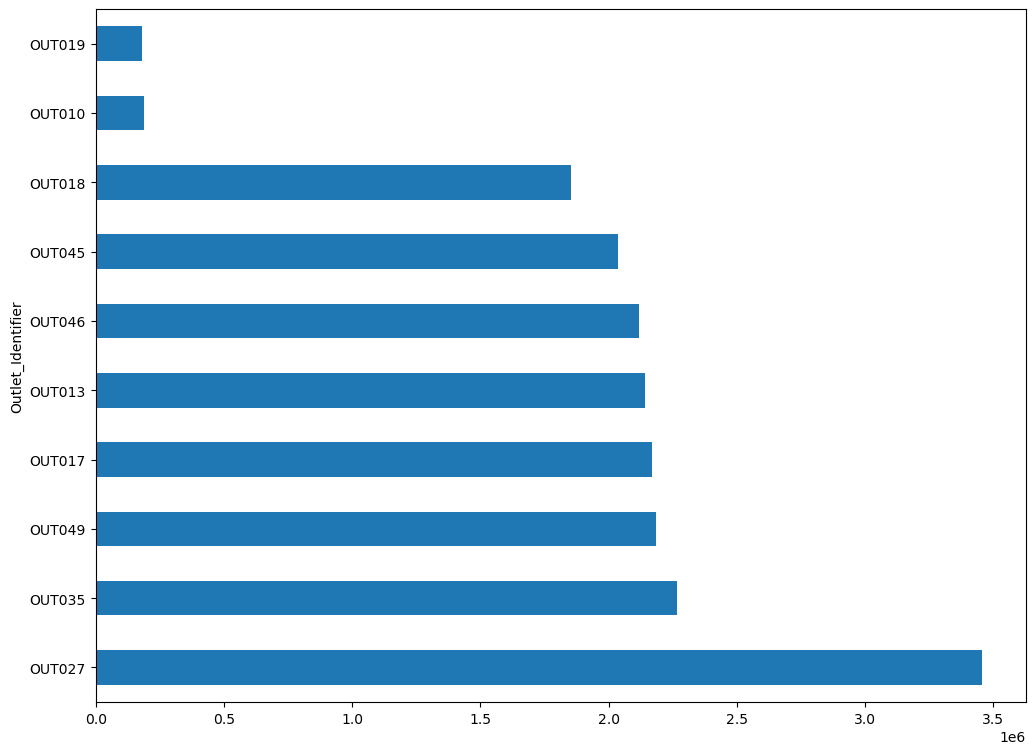

In [33]:
plt.figure(figsize=(12,9))
df_train.groupby(["Outlet_Identifier"])["Item_Outlet_Sales"].sum().sort_values(ascending=False).plot(kind = "barh");

why out10 and out19 have the lowest sales ?
why out27 has the highest sales ?

In [34]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
df_train.groupby(["Outlet_Identifier"])["Outlet_Type"].value_counts()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store        555
OUT013             Supermarket Type1    932
OUT017             Supermarket Type1    926
OUT018             Supermarket Type2    928
OUT019             Grocery Store        528
OUT027             Supermarket Type3    935
OUT035             Supermarket Type1    930
OUT045             Supermarket Type1    929
OUT046             Supermarket Type1    930
OUT049             Supermarket Type1    930
Name: Outlet_Type, dtype: int64

 outlet10 and outlet19 are grecory store but outlet27 is supermarket3 

is there a relation between outlet location and sales?

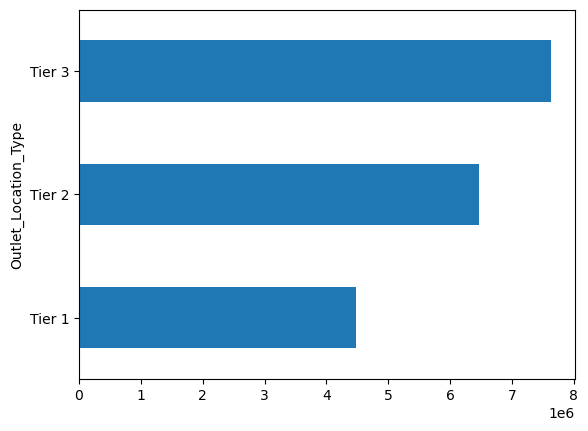

In [36]:
df_train.groupby(["Outlet_Location_Type"])["Item_Outlet_Sales"].sum().plot(kind = "barh");

what is the highest outlet size?

In [37]:
df_train["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [38]:
## delete "Outlet_Establishment_Year" column
df_train.drop(columns=['Outlet_Establishment_Year'], inplace=True)

# Buliding model

In [39]:
#importing sklearn libraries

from sklearn.model_selection import train_test_split
## linear regression model
from sklearn.linear_model import LinearRegression, Lasso
#DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
#xgboost
from xgboost import XGBRegressor
# Fine-Tune using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

In [40]:
lencod = LabelEncoder()

for i in df_cat:
    df_train[i]=lencod.fit_transform(df_train[i])
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,2,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,1,2,2,1845.5976


In [41]:
df_train["Item_Fat_Content"].unique()

array([0, 1])

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       8523 non-null   int64  
 1   Item_Weight           8523 non-null   float64
 2   Item_Fat_Content      8523 non-null   int64  
 3   Item_Visibility       8523 non-null   float64
 4   Item_Type             8523 non-null   int64  
 5   Item_MRP              8523 non-null   float64
 6   Outlet_Identifier     8523 non-null   int64  
 7   Outlet_Size           8523 non-null   int64  
 8   Outlet_Location_Type  8523 non-null   int64  
 9   Outlet_Type           8523 non-null   int64  
 10  Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 732.6 KB


In [43]:
#extract the data 
y = df_train["Item_Outlet_Sales"]
X = df_train.drop("Item_Outlet_Sales" ,axis = 1)

In [44]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [45]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,0,2,1


In [46]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state =42)

# linear regression model

In [47]:
lg = LinearRegression()

lg.fit(X_train, y_train)

LinearRegression()

In [48]:
r2_score(y_test, lg.predict(X_test)) 

0.520183701030358

# RandomForestRegressor model

In [49]:
forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [50]:
r2_score(y_test, forest_reg.predict(X_test)) 

0.550390673666385